In [1]:
#for GO
from goatools.obo_parser import GODag
from goatools.go_enrichment import GOEnrichmentStudy
from goatools.anno.gaf_reader import GafReader

#for plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the ontology structure i.e. the GO terms and their hierarchical relationship
# nodes = GO terms, edges = relationships
obo_file = "./go-basic.obo"
go_dag = GODag(obo_file)

./go-basic.obo: fmt(1.2) rel(2024-10-27) 44,017 Terms


In [3]:
# Load the gene annotations
# The annotated genes are linked to various GO terms
gaf_file = "./zfin.gaf"
gaf_reader = GafReader(gaf_file)
annotations = gaf_reader.read_gaf()

HMS:0:00:16.614310 255,269 annotations READ: ./zfin.gaf 
21846 IDs in loaded association branch, BP


In [4]:
# Your gene sets
interesting_genes ={'ZDB-GENE-081015-3','ZDB-GENE-050208-380','ZDB-GENE-060825-357','ZDB-GENE-060503-275','ZDB-GENE-030131-7291','ZDB-GENE-091204-278','ZDB-GENE-160728-123','ZDB-GENE-070912-381','ZDB-GENE-080212-5','ZDB-GENE-101021-1','ZDB-GENE-050327-9','ZDB-GENE-080214-5','ZDB-GENE-060929-1114','ZDB-GENE-040426-1651','ZDB-GENE-010503-1','ZDB-GENE-040426-1800','ZDB-GENE-040426-2304','ZDB-GENE-070810-6','ZDB-GENE-100422-16','ZDB-GENE-040808-52','ZDB-GENE-030131-5275','ZDB-GENE-121214-350','ZDB-GENE-020812-2','ZDB-GENE-041210-326','ZDB-GENE-160728-3','ZDB-GENE-030910-2','ZDB-GENE-131217-1','ZDB-GENE-040513-6','ZDB-GENE-091117-16','ZDB-GENE-041001-217','ZDB-GENE-040426-1853','ZDB-GENE-110913-1','ZDB-GENE-980526-71','ZDB-GENE-040724-105','ZDB-GENE-041014-369','ZDB-GENE-070822-20','ZDB-GENE-010716-2','ZDB-GENE-080128-1','ZDB-GENE-140106-142','ZDB-GENE-060503-863','ZDB-GENE-030131-3102','ZDB-GENE-980526-515','ZDB-GENE-050522-521','ZDB-GENE-050522-428','ZDB-GENE-030131-7540','ZDB-GENE-160728-129','ZDB-GENE-040718-72','ZDB-GENE-080722-16','ZDB-GENE-071004-57','ZDB-GENE-110411-70','ZDB-GENE-050419-26','ZDB-GENE-051111-1','ZDB-GENE-121214-270','ZDB-GENE-070928-16','ZDB-GENE-121214-150','ZDB-GENE-041001-194','ZDB-GENE-080616-2','ZDB-GENE-040426-2828','ZDB-GENE-030722-8','ZDB-GENE-121214-203','ZDB-GENE-040724-7','ZDB-GENE-030131-7228','ZDB-GENE-050417-343','ZDB-GENE-000627-1','ZDB-GENE-990914-3','ZDB-GENE-040718-290','ZDB-GENE-030909-1','ZDB-GENE-050327-9','ZDB-GENE-070824-1','ZDB-GENE-980526-90','ZDB-GENE-980526-29'}
# Use all annotated genes as background 
# (I think this can be switched to the genes detected in the experiment afterwards)
background_genes = set(annotations.keys())       


In [5]:
# Perform enrichment analysis
go_enrichment = GOEnrichmentStudy(
    background_genes,  # Background genes
    annotations,       # Gene-to-GO-term mapping
    go_dag,            # Ontology structure
    methods=['fdr_bh'] # Statistical correction method
)


Load  Ontology Enrichment Analysis ...
Propagating term counts up: is_a
100% 21,846 of 21,846 population items found in association


In [6]:
# Run enrichment
results = go_enrichment.run_study(interesting_genes)


Runing  Ontology Analysis: current study set of 70 IDs.
100%     53 of     53 study items found in association
 76%     53 of     70 study items found in population(21846)
Calculating 8,725 uncorrected p-values using fisher_scipy_stats
   8,725 terms are associated with 21,846 of 21,846 population items
     618 terms are associated with     53 of     70 study items
  METHOD fdr_bh:
      11 GO terms found significant (< 0.05=alpha) ( 11 enriched +   0 purified): statsmodels fdr_bh
      11 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


**Explanation of the output**

- The first row in the output above 'x % of study items found in association' means that x % of the genes that are I used as input of the GO enrichment analysis were found to have a known GO term associated.
- The second row 'y % of study items found in population' means that y% of my study set i.e. input genes are found in the reference population (here it corresponds to all zebrafish genes being annotated but it should be the set of genes detected in the experiment)

In [14]:
# Print significant results
for res in results:
    if res.p_fdr_bh < 0.05:  # Adjusted p-value threshold
        print(res)

GO:0006879	BP	e	intracellular iron ion homeostasis	5/53	32/21846	1.33e-08	6	5	0.000116	ZDB-GENE-030131-7540, ZDB-GENE-040718-72, ZDB-GENE-050522-428, ZDB-GENE-071004-57, ZDB-GENE-080722-16
GO:0006826	BP	e	iron ion transport            	5/53	41/21846	4.86e-08	8	5	0.000212	ZDB-GENE-030131-7540, ZDB-GENE-040718-72, ZDB-GENE-050522-428, ZDB-GENE-071004-57, ZDB-GENE-080722-16
GO:0000041	BP	e	transition metal ion transport	5/53	82/21846	1.64e-06	7	5	0.00477	ZDB-GENE-030131-7540, ZDB-GENE-040718-72, ZDB-GENE-050522-428, ZDB-GENE-071004-57, ZDB-GENE-080722-16
GO:0006873	BP	e	intracellular monoatomic ion homeostasis	6/53	223/21846	1.63e-05	4	6	0.0262	ZDB-GENE-030131-7540, ZDB-GENE-040718-72, ZDB-GENE-050522-428, ZDB-GENE-071004-57, ZDB-GENE-080722-16, ZDB-GENE-131217-1
GO:0030003	BP	e	intracellular monoatomic cation homeostasis	6/53	223/21846	1.63e-05	5	6	0.0262	ZDB-GENE-030131-7540, ZDB-GENE-040718-72, ZDB-GENE-050522-428, ZDB-GENE-071004-57, ZDB-GENE-080722-16, ZDB-GENE-131217-1
GO:0098771	BP

In [28]:
# Convert results into a DataFrame
results_data = []
for res in results:
    if res.p_fdr_bh < 0.05:  # Adjusted p-value threshold
        results_data.append({
            'GO Term': res.GO, 
            'Description': res.name,
            'p-value': res.p_fdr_bh,
            'Ratio': res.ratio_in_study
        })

df_results = pd.DataFrame(results_data)
df_results['Ratio'] = df_results['Ratio'].astype(str).str.strip('()').str.split(', ').apply(
    lambda x: int(x[0]) / int(x[1]) if len(x) == 2 else None
)
# Sort by p-value for better visualization
df_results = df_results.sort_values(by='p-value', ascending=True)

df_results['Description'] = df_results['Description'].astype(str)


In [29]:
df_results.head()

,GO Term,Description,p-value,Ratio
0,GO:0006879,intracellular iron ion homeostasis,0.000116,0.094340
1,GO:0006826,iron ion transport,0.000212,0.094340
2,GO:0000041,transition metal ion transport,0.004772,0.094340
3,GO:0006873,intracellular monoatomic ion homeostasis,0.026189,0.113208
4,GO:0030003,intracellular monoatomic cation homeostasis,0.026189,0.113208


/local/scratch/tmp/ipykernel_3459402/2289152200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


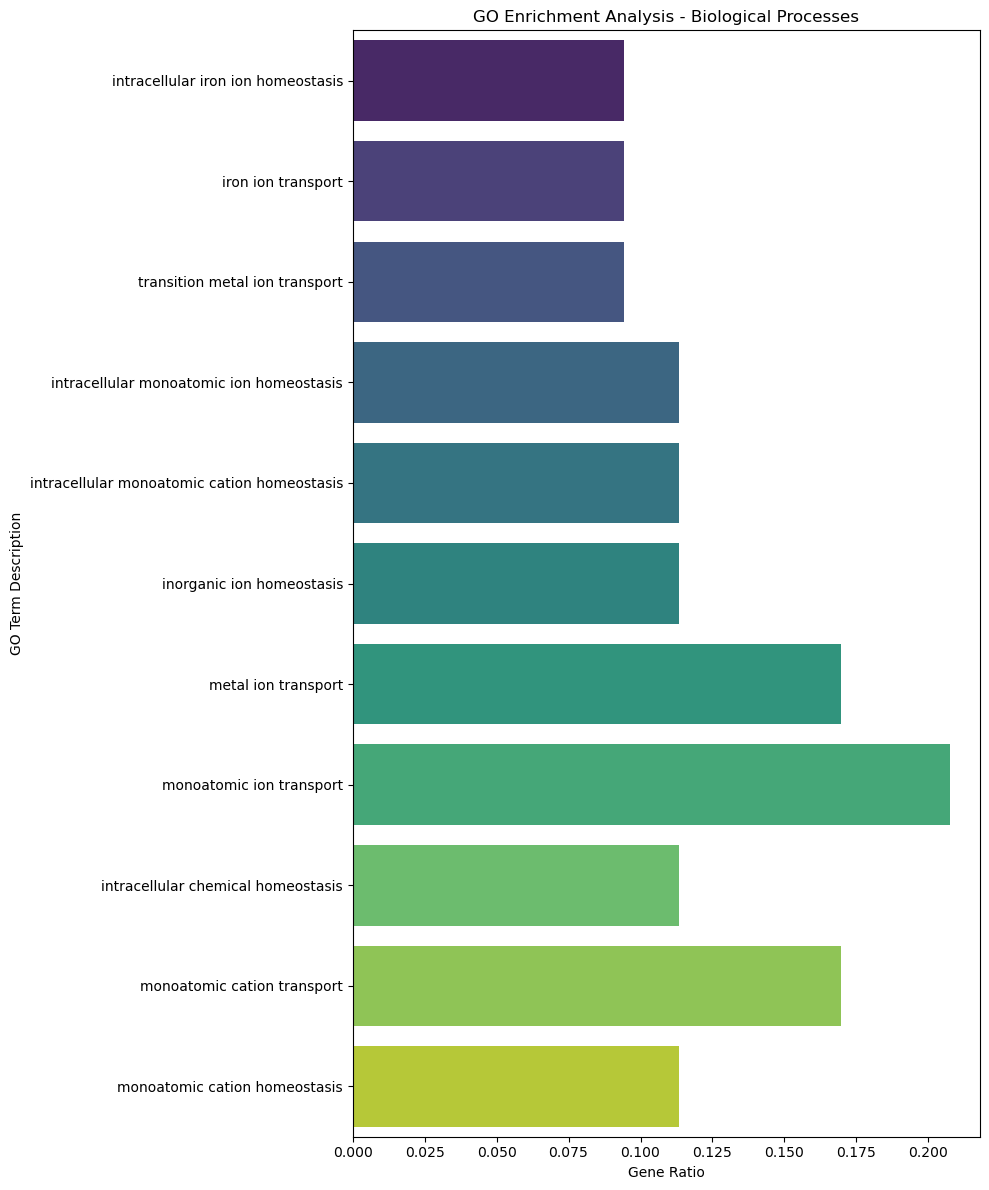

In [31]:
# Plot barplot using Seaborn
plt.figure(figsize=(10, 12))
sns.barplot(
    data=df_results, 
    x='Ratio', 
    y='Description', 
    palette='viridis'
)

plt.title('GO Enrichment Analysis - Biological Processes')
plt.xlabel('Gene Ratio')
plt.ylabel('GO Term Description')
plt.tight_layout()

# Save the plot
plt.savefig('Results_GO.png', dpi=250)
plt.show()